In [2]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


import time as time

# -------------- SET UP YOUR PATH ------------
import sys
# sys.path.append("~/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++")

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)
import pandas as pd
import scipy.integrate as integrate
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Example

## Allan Cahn equation

Found example of stochastic PDEs. 
General PDE case is : 
\begin{equation}
\frac{\partial u}{\partial t} =\frac{\partial^2 u}{\partial x^2} - \epsilon^{-2}f(x)
\end{equation}
Stochastic PDE case is : 
\begin{equation}
\frac{\partial u}{\partial t} =\frac{\partial^2 u}{\partial x^2} - \epsilon^{-2}f(x)+ W(t)
\end{equation}

The example of the Allan Cahn equation uses a double well potential:

\begin{align}
F(s) = \frac{(s^2-1)^2}{4} \\
f(s) = s^3-s
\end{align}

To obtain a discretise equation in time, one would need to also solve it in space. For instance if $u(x_n,t_j) \approx U^j_n$. so if I fix time, I can obtain: 

\begin{equation}
U_n^{j+1}=U_n^{j} +\Delta t \frac{\partial^2 U^j_n}{\partial x^2} -\Delta t \epsilon^{-2}f(x)+ \Delta W_n^j
\end{equation}

How do you actually compute the second derivative? 
https://fenicsproject.org/olddocs/dolfin/1.4.0/python/demo/documented/cahn-hilliard/python/documentation.html


Text(0.5, 1.0, 'Potential')

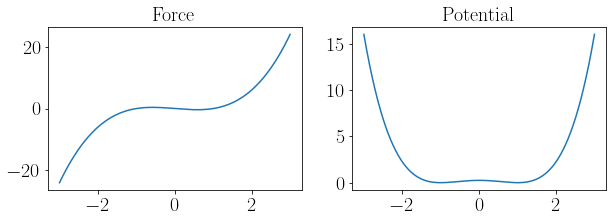

In [15]:
s = np.linspace(-3,3,1000)
fs = s*s*s-s
Fs = (s**2-1)**2/4

fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(10,3))# plt.figure(figsize=(4,4))
ax1.plot(s,fs,label="fs")
ax1.set_title("Force")

ax2.plot(s,Fs,label="Fs")
ax2.set_title("Potential")

## Horseshoe estimator for sparse signal

To use that, one needs to dig into a Bayesian inf setting. Typically, when trying to estimate a parameter $\theta$ where we have data $X_k$, outcome data $Y_k$ : 
\begin{equation}
\theta_n \in \arg \min { \frac{1}{n} \sum_{k=1}^n (\theta^T X_k-Y_k)^2 + \lambda r(\|\theta\|) }
\end{equation}

My guess is that it translates to the langevin SDE as replacing the potential as $V(x) \rightarrow V(x)+ \lambda r(\|x\|)$. From paper (horseshoe for sparse signal), we have that lasso implementation of the horseshoe prior is: 
\begin{equation}
p(\lambda_i^2)= \frac{c}{d^2}\left(1+\frac{\lambda_i^2}{d^2}\right)^{-(c-1)}
\end{equation}
(why?)

More generally, this is part of a serie of priors called shrinkage process. 

Not too sure how adding this term to the SDE, do this ? 

$$
dX = -\frac{d(V(x) + \lambda r(\|x\|)}{dx} dt + \sqrt{2 \tau} dW(t)
$$

-> Follow Stochastic Gradient Langevin Dynamics paper

\begin{align}
\Delta \theta_t &= \frac{\epsilon_t}{2} \left(\nabla \log p (\theta_t) + \frac{N}{n} \sum_{i=1}^{n} \nabla \log p(x_{ti}|\theta_t) \right) + \eta_t \\
\eta_t &\sim N(0, \epsilon_t)
\end{align}

From Penalized Indirect Inference (Blasques and Duplinskiy): simple penalty given by 
\begin{equation}
\pi_T(\theta)= \frac{1}{T}(\theta - 1/2)^2
\end{equation}

<ipython-input-3-5dea439dfad9>:12: RuntimeWarning: divide by zero encountered in true_divide
  prior2 = 1/(np.sqrt(s*(1-s)))


Text(0.5, 1.0, 'Horse shoe prior')

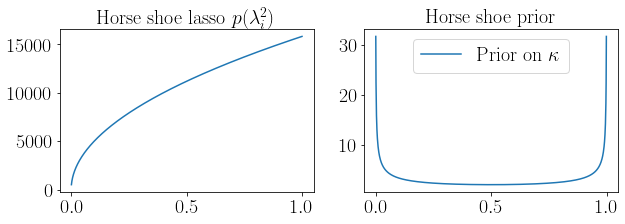

In [3]:
s = np.linspace(0,1,1000)
def horse_lasso(l,c,d2):
    res= c/d2*(1+l/d2)**(-c+1)
    return res

res=horse_lasso(s,0.5,0.001)
fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(10,3))# plt.figure(figsize=(4,4))
ax1.plot(s,res,label="fs")
ax1.set_title("Horse shoe lasso $p(\lambda_i^2)$")

prior = 1/(1+s*s)
prior2 = 1/(np.sqrt(s*(1-s)))
# ax2.plot(s,prior,label="Prior on $\lambda$")
ax2.plot(s,prior2,label="Prior on $\kappa$")
ax2.legend()
ax2.set_title("Horse shoe prior")


Text(0.5, 1.0, 'Potential with horse shoe prior')

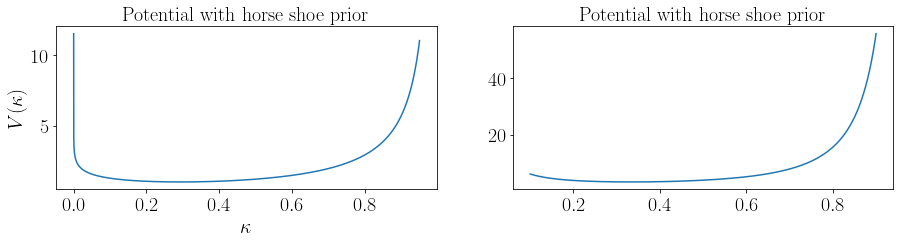

In [4]:
def potential_horse(x):
    potential=0.5*1/(x**(-1)-1) - 0.5*(np.log(x)+np.log(1-x))
    return potential

def gradient_potential_horse(x):
    potential=0.5*1/(x-1)**2 + 0.5*(1/x+1/(1-x))
    return potential
x = np.linspace(0.0000000001,0.95,100000)
fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(15,3))# plt.figure(figsize=(4,4))
ax1.plot(x,potential_horse(x),label="fs")
ax1.set_title("Potential with horse shoe prior")
x = np.linspace(0.1,0.9,100000)
ax1.set_ylabel("$V(\kappa)$")
ax1.set_xlabel("$\kappa$")

ax2.plot(x,gradient_potential_horse(x),label="fs")
ax2.set_title("Potential with horse shoe prior")


## Try a simple toy problem : sigmoid function regularised
$$
y(x) = \frac{1}{1+\exp(5x+10)} + \frac{1}{1+\exp(5x-10)} + 0.01 x^2
$$

Text(0.5, 1.0, 'Sigmoid function')

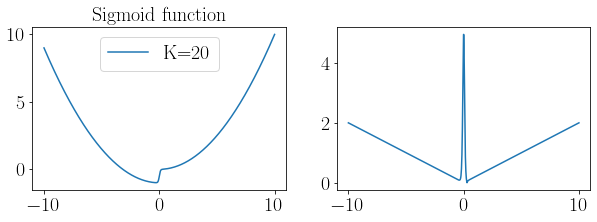

In [24]:
s = np.linspace(-10,10,1000)
K=100
a=0
b=0
def pot_sig(s,K):
    fs =-1/(1+np.exp((s-a)*K))+0.1*(s-b)**2
    return fs

def f(s,K):
    fprime2=-K*np.exp((s-a)*K)/(1+np.exp((s-a)*K))**2+0.2*(s-b)
    return np.abs(fprime2)


fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(10,3))# plt.figure(figsize=(4,4))
# K=10
# ax1.plot(s,pot_sig(s,K),label="K="+str(K))
# ax2.plot(s,f(s,K),label="K="+str(K))

# K=20
# ax1.plot(s,pot_sig(s,K),label="K="+str(K))
# ax2.plot(s,f(s,K),label="K="+str(K))

# K=40
# ax1.plot(s,pot_sig(s,K),label="K="+str(K))
# ax2.plot(s,f(s,K),label="K="+str(K))

K=20

ax1.plot(s,pot_sig(s,K),label="K="+str(K))
ax2.plot(s,f(s,K),label="K="+str(K))

ax1.legend()
ax1.set_title("Sigmoid function")
ax1.legend()
ax1.set_title("Sigmoid function")

<ipython-input-23-47ce4aa76c52>:13: RuntimeWarning: overflow encountered in square
  fprime=K*expkminus1/(1+expkminus1)**2-K*expkplus1/(1+expkplus1)**2+0.2*s
<ipython-input-23-47ce4aa76c52>:6: RuntimeWarning: overflow encountered in power
  f =K*expkminus1/np.power((1+expkminus1),2)-K*expkplus1/np.power((1+expkplus1),2)+0.2*x
<ipython-input-23-47ce4aa76c52>:6: RuntimeWarning: overflow encountered in power
  f =K*expkminus1/np.power((1+expkminus1),2)-K*expkplus1/np.power((1+expkplus1),2)+0.2*x
<ipython-input-23-47ce4aa76c52>:6: RuntimeWarning: overflow encountered in power
  f =K*expkminus1/np.power((1+expkminus1),2)-K*expkplus1/np.power((1+expkplus1),2)+0.2*x


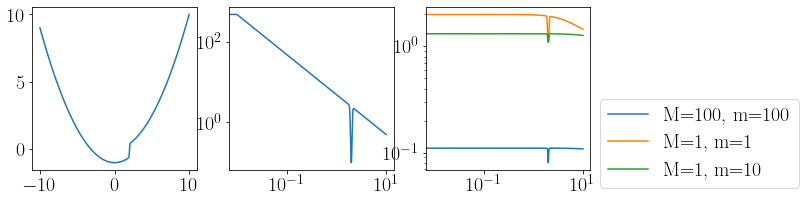

In [23]:
M=10
m=1
def g(x,K,M,m):
    expkminus1=np.exp((x-2)*K)
    expkplus1=np.exp((x+2)*K)
    f =K*expkminus1/np.power((1+expkminus1),2)-K*expkplus1/np.power((1+expkplus1),2)+0.2*x
    g=1/M+1/np.power((np.power(np.abs(f),2)+m),1/2)
    return g

def f(s,K):
    expkminus1=np.exp((s-2)*K)
    expkplus1=np.exp((s+2)*K)
    fprime=K*expkminus1/(1+expkminus1)**2-K*expkplus1/(1+expkplus1)**2+0.2*s
    fprime = 1/np.abs(fprime)
    return fprime

def pot_sig(s,K):
    expkminus1=np.exp((s-2)*K)
    # expkplus1=np.exp((s+2)*K)
    fs =-1/(1+expkminus1)+0.1*s**2
    return fs

s = np.linspace(-10,10,1000)
fig, (ax1,ax2,ax3)= plt.subplots(1, 3,figsize=(10,3))# plt.figure(figsize=(4,4))
K=40
ax1.plot(s,pot_sig(s,K),label="K="+str(K))
ax2.loglog(s,f(s,K),label="K="+str(K))
M=100
m=100
ax3.loglog(s,g(s,K,M,m),label="M="+str(M)+", m="+str(m))
M=1
m=1
ax3.loglog(s,g(s,K,M,m),label="M="+str(M)+", m="+str(m))
M=1
m=10
ax3.loglog(s,g(s,K,M,m),label="M="+str(M)+", m="+str(m))
ax3.legend(bbox_to_anchor=[1, 0.5])

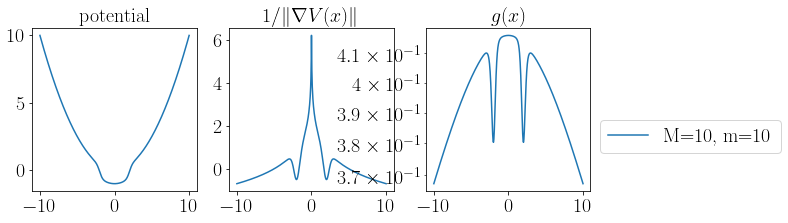

In [156]:
M=10
m=1
def g2(x,K,M,m):
    expkminus1=np.exp((x-2)*K)
    expkplus1=np.exp((x+2)*K)
    f =K*expkminus1/np.power((1+expkminus1),2)-K*expkplus1/np.power((1+expkplus1),2)+0.2*x
    ftilde=1/np.abs(f)
    g=1/M+1/np.power((np.power(f,2)+m),1/2)
    return g

def ftilde(s,K):
    expkminus1=np.exp((s-2)*K)
    expkplus1=np.exp((s+2)*K)
    fprime=K*expkminus1/(1+expkminus1)**2-K*expkplus1/(1+expkplus1)**2+0.2*s
    fprime = 1/np.abs(fprime)
    return fprime

def pot_sig(s,K):
    expkminus1=np.exp((s-2)*K)
    expkplus1=np.exp((s+2)*K)
    fs =-1/(1+expkminus1)+ 1/(1+expkplus1)+0.1*s**2
    return fs

s = np.linspace(-10,10,1000)
fig, (ax1,ax2,ax3)= plt.subplots(1, 3,figsize=(10,3))# plt.figure(figsize=(4,4))
K=5
ax1.plot(s,pot_sig(s,K),label="K="+str(K))
ax1.set_title("potential")
ax2.plot(s,np.log(ftilde(s,K)),label="K="+str(K))
ax2.set_title("$1/\|\\nabla V(x)\|$")

M=10
m=10
ax3.plot(s,(g2(s,K,M,m)),label="M="+str(M)+", m="+str(m))
# M=1
# m=1
# ax3.plot(s,(g2(s,K,M,m)),label="M="+str(M)+", m="+str(m))
# M=1
# m=10
# ax3.plot(s,(g2(s,K,M,m)),label="M="+str(M)+", m="+str(m))
ax3.set_title("$g(x)$")

ax3.set_yscale("log")
ax3.legend(bbox_to_anchor=[1, 0.5])

### Moreau-Yosida envelopes- (Peyrera 2016)

Introduce a parameter $\lambda$ to smooth dirichlet prior, when $\lambda$ decreases, the invariant distribution of the equation with the regularised term converge toward the true invariant. Use proximal method. 

$$
X_{k+1}^{M} = \left(1-\frac{\gamma}{\lambda}\right)X_{k}^{M} - \gamma \nabla f(X_{k}^{M}) + \frac{\gamma}{\lambda} \text{prox}^{\lambda}_g (X_{k}^{M}) + \sqrt{2 \gamma} Z_{k+1}
$$


We could also try Invariant probability measure with density proportional to e −V for the anisotropic
two-dimensional potential $V (x, y) = 100(x^2 + y^2 − 1)^2$